In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from context import clustering, findendpoints, filterbythreshold, memorystorage, get_environment_percentile

In [2]:
test_cases = json.load(open('testCases.json', 'r'))
storage = memorystorage.MemoryStorage()
approaches = {
    'Clustering': {
        'detector': clustering.Clusterer(storage),
        'param': 'num_clusters',
        'values': [24]
    },
    'Endpoint Finding (percentile)': {
        'detector': findendpoints.EndpointFinder(storage),
        'param': 'percentile',
        'values': [10, 20, 30, 40]
    },
    'Endpoint Finding (window size)': {
        'detector': findendpoints.EndpointFinder(storage),
        'param': 'window_ratio',
        'values': [0.1]
    }
}

Average for 98: 149.10989342403633
Average for 99: 112.11806575963718
Average for 99.2: 106.89697959183677
Average for 99.5: 57.19830158730163
Average for 99.9: 59.17201133786849
Average for 100: 72.93614285714287


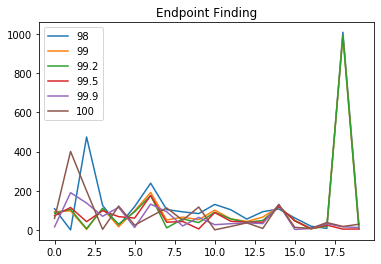

Average for 98: 93.35899319727888
Average for 99: 72.09756689342404
Average for 99.2: 68.9102494331066
Average for 99.5: 73.61975056689343
Average for 99.9: 93.68616326530612
Average for 100: 123.3321859410431


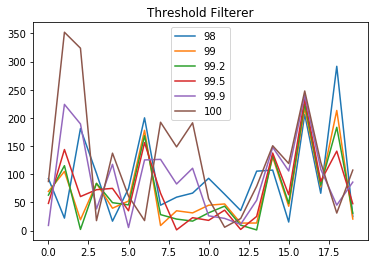

In [6]:
t_vals = [98, 99, 99.2, 99.5, 99.9, 100]
t_users = {
    'Endpoint Finding': findendpoints.EndpointFinder(storage),
    'Threshold Filterer': filterbythreshold.Filterer(storage)
}
for name, detector in t_users.items():
    for v in t_vals:
        errors = []
        for case in test_cases:
            threshold = get_environment_percentile('recordings/' + case['ambUri'], v)
            id = storage.create_evaluation(threshold, '')
            audio, sr = sf.read('recordings/' + case['speechUri'])
            duration = detector.measure(audio, sr, id, '')
            errors.append(abs(duration - case['speechDuration']))
        plt.plot(errors, label=v)
        print('Average for {}: {}'.format(v, np.mean(errors)))
    plt.title(name)
    plt.legend()
    plt.show()

Running Method: Clustering
Running Value: 24


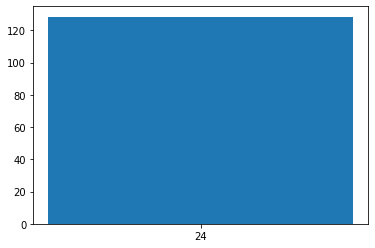

Running Method: Endpoint Finding (percentile)
Running Value: 10
Running Value: 20
Running Value: 30
Running Value: 40


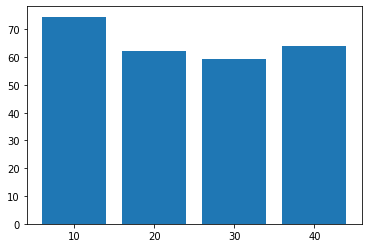

Running Method: Endpoint Finding (window size)
Running Value: 0.1


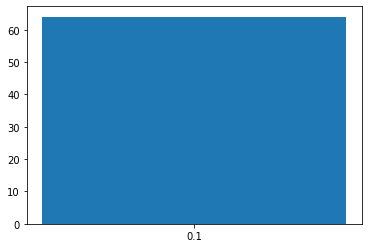

In [3]:
for name, options in approaches.items():
    print('Running Method: {}'.format(name))
    error_map = {}
    detector = options['detector']
    param = options['param']
    for v in options['values']:
        print('Running Value: {}'.format(v))
        errors = []
        for case in test_cases:
            threshold = get_environment_percentile('recordings/' + case['ambUri'])
            id = storage.create_evaluation(threshold, '')
            audio, sr = sf.read('recordings/' + case['speechUri'])
            duration = detector.measure(audio, sr, id, '', **{param: v})
            errors.append(abs(duration - case['speechDuration']))   
        error_map[v] = np.mean(errors)
    labels = list(error_map.keys())
    heights = list(error_map.values())
    x = [i for i in range(len(heights))]
    plt.bar(x, heights, tick_label=labels)
    plt.show()

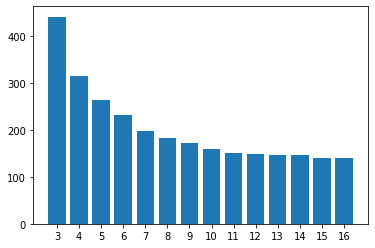

In [6]:
labels = list(error_map.keys())
heights = list(error_map.values())
x = [i for i in range(len(heights))]
plt.bar(x, heights, tick_label=labels)
plt.show()
print()